In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

[]

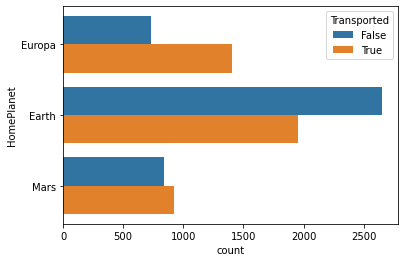

In [5]:
sns.countplot(y=df['HomePlanet'], hue=df['Transported']).plot()

[]

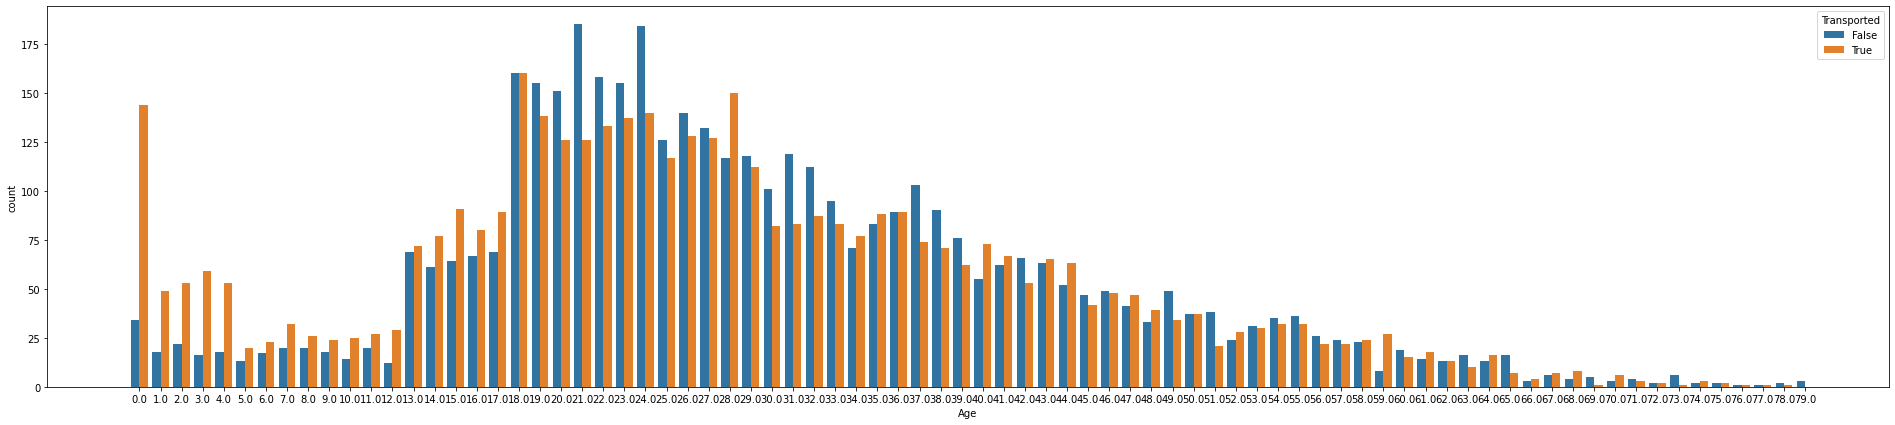

In [6]:
fig, ax = plt.subplots(figsize=(33,7))
sns.countplot(x=df['Age'], hue=df['Transported'], ax=ax).plot()

[]

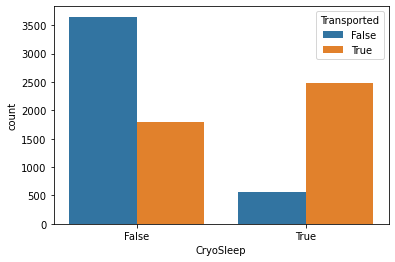

In [7]:
sns.countplot(x=df['CryoSleep'], hue=df['Transported']).plot()

[]

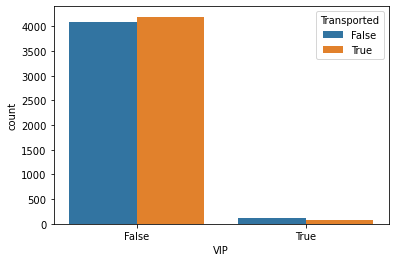

In [8]:
sns.countplot(x=df['VIP'], hue=df['Transported']).plot()

In [9]:
pd.crosstab(df['VIP'], df['Transported'])

Transported,False,True
VIP,,
False,4093,4198
True,123,76


In [20]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(df['VIP'],df['Transported']))

(11.542020738162797,
 0.0006804064556968345,
 1,
 array([[4117.17974087, 4173.82025913],
        [  98.82025913,  100.17974087]]))

[]

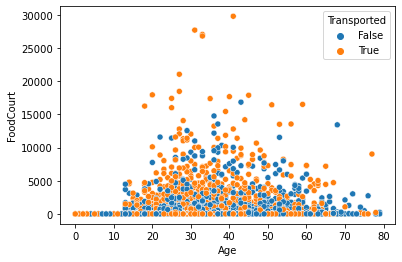

In [14]:
sns.scatterplot(x=df['Age'], y=df['FoodCourt'], hue=df['Transported']).plot()

[]

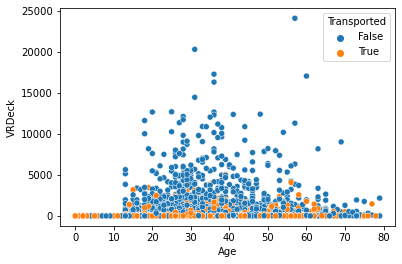

In [15]:
sns.scatterplot(x=df['Age'], y=df['VRDeck'], hue=df['Transported']).plot()

[]

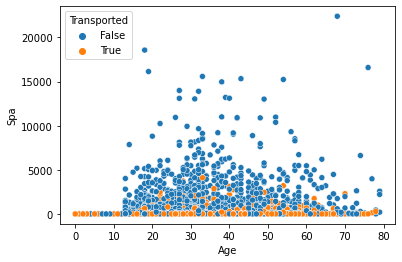

In [16]:
sns.scatterplot(x=df['Age'], y=df['Spa'], hue=df['Transported']).plot()

[]

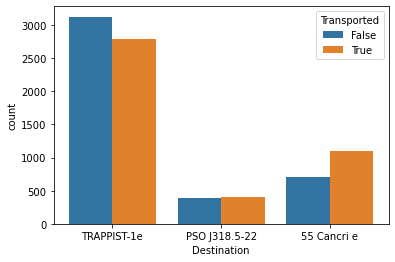

In [17]:
sns.countplot(x=df['Destination'], hue=df['Transported']).plot()

In [18]:
pd.crosstab(df['Destination'], df['Transported'])

Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787


In [22]:
chi2_contingency(pd.crosstab(df['VIP'],df['Transported']))

(11.542020738162797,
 0.0006804064556968345,
 1,
 array([[4117.17974087, 4173.82025913],
        [  98.82025913,  100.17974087]]))

[]

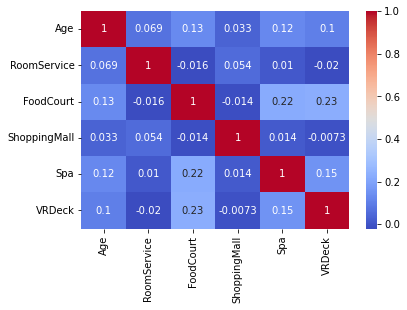

In [23]:
sns.heatmap(df.iloc[:,:-1].corr(), cmap='coolwarm', annot=True).plot()

In [24]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [25]:
good_label = ['HomePlanet','CryoSleep','Destination','Age','VIP','FoodCourt','VRDeck','RoomService','Spa']
df[good_label].headad()

,HomePlanet,CryoSleep,Destination,Age,VIP,FoodCourt,VRDeck,RoomService,Spa
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,9.0,44.0,109.0,549.0
2,Europa,False,TRAPPIST-1e,58.0,True,3576.0,49.0,43.0,6715.0
3,Europa,False,TRAPPIST-1e,33.0,False,1283.0,193.0,0.0,3329.0
4,Earth,False,TRAPPIST-1e,16.0,False,70.0,2.0,303.0,565.0


In [26]:
#missing values
df[good_label].isna().sum()

HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
FoodCourt      183
VRDeck         188
RoomService    181
Spa            183
dtype: int64

In [27]:
#unique values
df[good_label].nunique()

HomePlanet        3
CryoSleep         2
Destination       3
Age              80
VIP               2
FoodCourt      1507
VRDeck         1306
RoomService    1273
Spa            1327
dtype: int64

In [29]:
#Splittinng the data

from sklearn.model_selection import train_test_split

X = df[good_label]
y = df.Transported

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [30]:
X_train.shape

(6954, 9)

In [34]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_col = ['Age','FoodCourt','VRDeck','RoomService','Spa']
cat_col = ['HomePlanet','CryoSleep','Destination','VIP']

od = OrdinalEncoder()
X_train[cat_col] = od.fit_transform(X_train[cat_col])
X_test[cat_col] = od.transform(X_test[cat_col])

#Filling NA For numerical columns
simp = SimpleImputer(strategy = 'mean')
X_train[num_col] = simp.fit_transform(X_train[num_col])
X_test[num_col] = simp.transform(X_test[num_col])

#Filling NA For categorical columns
simp = SimpleImputer(strategy = 'constant')
X_train[cat_col] = simp.fit_transform(X_train[cat_col])
X_test[cat_col] = simp.transform(X_test[cat_col])

scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.transform(X_test[num_col])

In [36]:
# Training Model

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    
    layers.BatchNormalization(),
    layers.Dense(units = 512,activation='relu',input_shape = [X_train.shape[1]]),
    layers.Dropout(rate = 0.3),
    layers.BatchNormalization(),
    layers.Dense(units = 256,activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.BatchNormalization(),
    layers.Dense(units = 1,activation='sigmoid'),
    
])

In [37]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],
)

In [39]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

<AxesSubplot:>

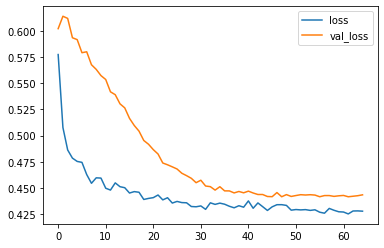

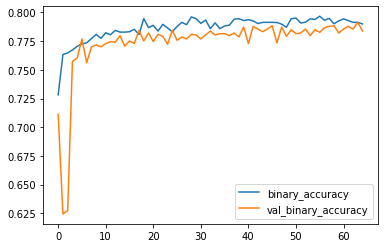

In [40]:
history_df = pd.DataFrame(history.history)

history_df[['loss', 'val_loss']].plot()
history_df[['binary_accuracy', 'val_binary_accuracy']].plot()

In [41]:
def normalize(pred):
    for i in range(0, len(pred)):
        if pred[i] > 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
            
    return pred

In [42]:
predicted_values = model.predict(X_test)

#normalize values

predicted_values = normalize(predicted_values)

[]

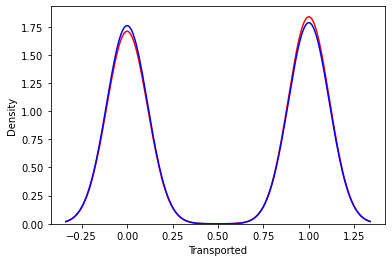

In [44]:
sns.distplot(predicted_values,color='red',hist=False,).plot()
sns.distplot(y_test,color='blue',hist=False,).plot()

In [45]:
final_df = pd.read_csv('test.csv')
final_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [46]:
final_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [47]:
f_df = final_df[good_label]
f_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,FoodCourt,VRDeck,RoomService,Spa
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,9.0,0.0,0.0,2823.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,6652.0,585.0,0.0,181.0
4,Earth,False,TRAPPIST-1e,20.0,False,0.0,0.0,10.0,0.0


In [49]:
od = OrdinalEncoder()
f_df[cat_col] = od.fit_transform(f_df[cat_col])

#Filling NA For numerical columns
simp = SimpleImputer(strategy = 'mean')
f_df[num_col] = simp.fit_transform(f_df[num_col])

#Filling NA For categorical columns
simp = SimpleImputer(strategy = 'constant')
f_df[cat_col] = simp.fit_transform(f_df[cat_col])

scale = StandardScaler()
f_df[num_col] = scale.fit_transform(f_df[num_col])

In [50]:
f_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,FoodCourt,VRDeck,RoomService,Spa
0,0.0,1.0,2.0,-0.118222,0.0,-0.291352,-0.251561,-0.364780,-0.274558
1,0.0,0.0,2.0,-0.688601,0.0,-0.285385,-0.251561,-0.364780,2.283008
2,1.0,1.0,0.0,0.166968,0.0,-0.291352,-0.251561,-0.364780,-0.274558
3,1.0,0.0,2.0,0.666051,0.0,4.118523,0.222074,-0.364780,-0.110576
4,0.0,0.0,2.0,-0.617304,0.0,-0.291352,-0.251561,-0.348143,-0.274558


In [51]:
final_prediction = model.predict(f_df)
final_prediction

array([[0.6243028 ],
       [0.01474383],
       [0.99136764],
       ...,
       [0.95939547],
       [0.811463  ],
       [0.5746186 ]], dtype=float32)

In [52]:
final_prediction = normalize(final_prediction)
final_prediction

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

[]

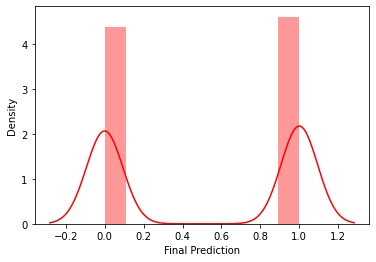

In [53]:
sns.distplot(final_prediction,color='red', axlabel='Final Prediction').plot()

In [54]:
#converting 0 to False and 1 to True
final_prediction = list(final_prediction)
for i in range (len(final_prediction)):
    if final_prediction[i] == 1:
        final_prediction[i] = 'True'
    if final_prediction[i] == 0:
        final_prediction[i] =='False'

In [55]:
submission = pd.DataFrame(final_df.iloc[:,0])
submission['Transported'] = final_prediction
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,[0.0]
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,[0.0]
4274,9271_01,True
4275,9273_01,True


In [56]:
submission.to_csv('final_csv', index=False)